In [34]:
%matplotlib widget 

import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [35]:
rep_argo = '/Volumes/ref-argo/gdac/dac/coriolis'
float1 = '7902215'
float2 = '6990661'

In [36]:
p = Path(rep_argo)
nom_file1 = p.joinpath(float1).joinpath(float1 + '_' + 'Sprof.nc')
ds1 = xr.open_dataset(nom_file1,engine='argo')
nom_file2 = p.joinpath(float2).joinpath(float2 + '_' + 'Sprof.nc')
ds2 = xr.open_dataset(nom_file2,engine='argo')

<Axes: >

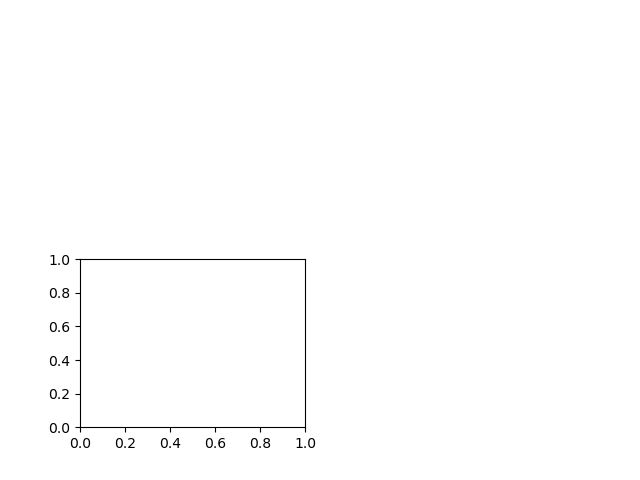

In [43]:
plt.figure()
plt.subplot(2,2,3)

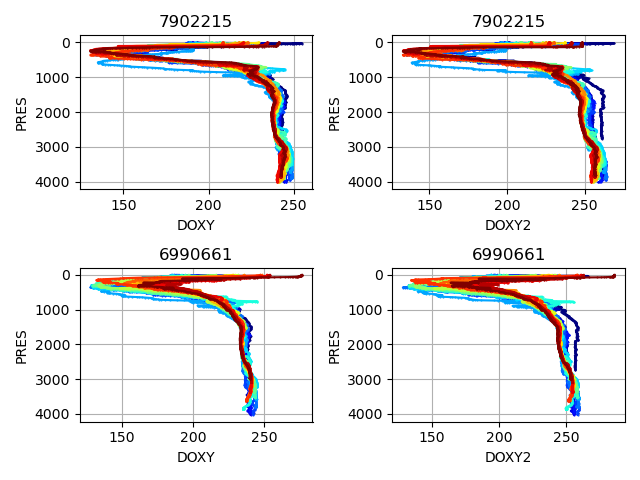

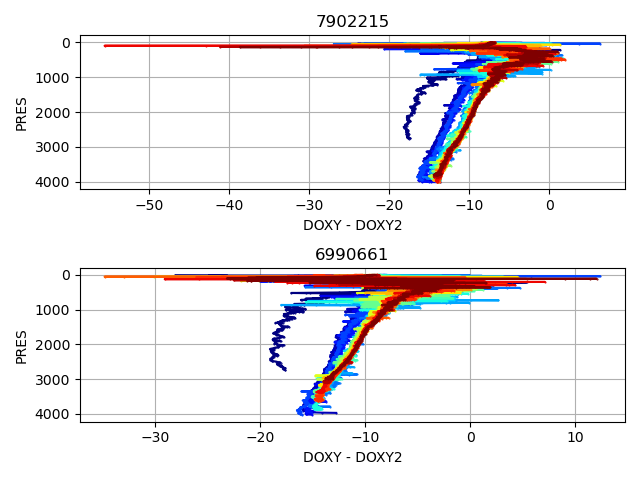

In [45]:
num_prof = ds1['N_PROF'].values
norm = plt.Normalize(vmin=np.min(num_prof), vmax=np.max(num_prof))
cmap = matplotlib.colormaps.get_cmap('jet')  
colors = cmap(norm(num_prof))  
plt.figure()
for i_prof in num_prof:
    plt.subplot(2,2,1)
    _=plt.plot(ds1['DOXY'].isel(N_PROF=i_prof),ds1['PRES'].isel(N_PROF=i_prof),'.-',color=colors[i_prof],markersize=1)
    plt.subplot(2,2,2)
    _=plt.plot(ds1['DOXY2'].isel(N_PROF=i_prof),ds1['PRES'].isel(N_PROF=i_prof),'.-',color=colors[i_prof],markersize=1)
    plt.subplot(2,2,3)
    _=plt.plot(ds2['DOXY'].isel(N_PROF=i_prof),ds2['PRES'].isel(N_PROF=i_prof),'.-',color=colors[i_prof],markersize=1)
    plt.subplot(2,2,4)
    _=plt.plot(ds2['DOXY2'].isel(N_PROF=i_prof),ds2['PRES'].isel(N_PROF=i_prof),'.-',color=colors[i_prof],markersize=1)

for i_plot in range(1,5):
    plt.subplot(2,2,i_plot)
    plt.grid()
    plt.gca().invert_yaxis()
    if (i_plot==1) | (i_plot==3):
        plt.xlabel('DOXY')
        plt.ylabel('PRES')
    else :
        plt.xlabel('DOXY2')
        plt.ylabel('PRES')
    if (i_plot<=2):
        plt.title(ds1['PLATFORM_NUMBER'].isel(N_PROF=0).values)
    else:
        plt.title(ds2['PLATFORM_NUMBER'].isel(N_PROF=0).values)
   
plt.tight_layout()

plt.figure()
for i_prof in num_prof:
    plt.subplot(2,1,1)
    plt.plot(ds1['DOXY'].isel(N_PROF=i_prof)-ds1['DOXY2'].isel(N_PROF=i_prof),ds1['PRES'].isel(N_PROF=i_prof),'.-',color=colors[i_prof],markersize=1)
    plt.title(ds1['PLATFORM_NUMBER'].isel(N_PROF=0).values)
    plt.subplot(2,1,2)
    plt.plot(ds2['DOXY'].isel(N_PROF=i_prof)-ds2['DOXY2'].isel(N_PROF=i_prof),ds2['PRES'].isel(N_PROF=i_prof),'.-',color=colors[i_prof],markersize=1)
    plt.title(ds2['PLATFORM_NUMBER'].isel(N_PROF=0).values)

for i_plot in range(1,3):
    plt.subplot(2,1,i_plot)
    plt.grid()
    plt.gca().invert_yaxis()
    plt.xlabel('DOXY - DOXY2')
    plt.ylabel('PRES')
    
plt.tight_layout()


In [111]:
diff_abs = abs(np.array(ds1['DOXY'])-np.array(ds1['DOXY2']))
indice_max_diff = np.unravel_index(np.nanargmax(diff_abs,axis=None), diff_abs.shape)
print(np.nanargmax(diff_abs))
print(np.nanmax(diff_abs))
print(indice_max_diff)
print(ds1['DOXY'][indice_max_diff].values)
print(ds1['DOXY2'][indice_max_diff].values)

13235
55.59842
(19, 49)
167.27724
222.87566
